## Econ 1923 - CPI project

In [1]:
import requests
import json
import pandas as pd

In [2]:
%run APIkeys.py
key = os.environ['BLS_API_key']

API keys loaded


### 2.1 Items and Weights
Your basket must include at least 8 ingredients.
https://download.bls.gov/pub/time.series/cu/cu.item

Student expenses
- SEEB01	College tuition and fees; weight: 0.4
- SERF01	Club membership for shopping clubs, fraternal, or other organizations, or participant sports fees; weight: 0.01
- SSEA011	College textbooks; weight: 0.02
- SEFP01	Coffee; weight: 0.01
- SAA	    Apparel; weight: 0.1
- SS62032	Admission to sports; weight: 0.06
- SEFV	    Food away from home; weight: 0.15
- SEFT02	Frozen food; weight: 0.25


- SAR     Recreation; 0.4
- SAS4    Transportation services; 0.25
- SAA     Apparel; 0.02
- SAM     Medical care; 0.01
- SEFV    food away from home; 0.15
- SAF11   food at home; 0.1
- SAF114  beverages; 0.01
- SERC02  sports equipment; 0.06



### 2.2 Locations and weights
The locations where these prices are measured. List at least three locations (cities/areas) based on where the team members either live now, lived in the past, or want to live in the future.2 Choose weights for these locations according to your liking.

- S12B    Philadelphia, PA; weight: 0.5
- S23A	  Chicago, IL; weight: 0.3
- S49D    Seattle, WA; weight: 0.2

### 2.3 Finalizing the basket
Combining the choices of items and locations, find all the series names. assign a weight for each series that combines the weights that you chose for the items and the weights you chose for the locations.


- CUURS23ASAR;       Recreation in Chicago; weight **0.23**
- CUUR0200SAS4;      Public transportation in Midwest; weight **0.18**
- CUURS12BSAA;       Apparel in the Northeast; weight **0.17**
- CUUR0100SAM;       Medicine NE; weight **0.05**
- CUURS49DSEFV       Food away in NE; weight **0.11**
- CUURS49DSAF111;      Food home in Seattle; weight **0.10**
- CUURS49DSAF114;    Non-alcoholic beverages in Seattle; weight **0.07**
- CUUR0000SERC02;    Sports equipment US; weight **0.09**



Finalized basket:
- CUURS23ASAR;       Recreation in Chicago; weight **0.22**
- CUUR0200SAS4;      Public transportation in Midwest; weight **0.17**
- CUURS12BSAA;       Apparel in the Northeast; weight **0.16**
- CUUR0100SAM;       Medicine NE; weight **0.04**
- CUURS49DSEFV       Food away in NE; weight **0.11**
- CUURS49DSAF111;    Food home in Seattle; weight **0.09**
- CUURS23ASAR;       Recreation in Philadelphia; weight **0.13**
- CUUR0000SERC02;    Sports equipment US; weight **0.08**

## 3. Downloading the data 
### 3.1 Refine the basket
First, verify that the series you created in the previous section exist in the BLS’ API. If some items do not exist, take them out and re-weight. If a certain location produces all the missing series, replace that location with a bigger or more general location.3
After you made all the changes and adjustments, state the final basket and the weights for each item in the basket. Table format will be great here.

In [3]:
def Series(varList,myKey):
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'  #this will not change
    headers = {'Content-type': 'application/json'}  #This will not changed !

    parameters = {
        "seriesid":varList,
        "startyear":"2012", 
        "endyear":"2022",
        "catalog":True, 
        "calculations":False, 
        "annualaverage":False,
        "aspects":False,
        "registrationkey": myKey 
     }

    data = json.dumps(parameters) #this converts the Python dictionary into a JSON format
    
    p = requests.post(base_url, data=data, headers=headers)
    json_data = json.loads(p.text)
    
    return json_data

In [4]:
# what items exist for philly: beverages, food away, food at home, apparel
basket2 = ['CUURS12BSAF114', 'CUURS12BSERF01','CUURS12BSSEA011', 'CUURS12BSEFP01', 'CUURS12BSAA', 
          'CUURS12BSS62032', 'CUURS12BSEFV', 'CUURS12BSAF11']

In [5]:
# what items exist for North East: beverages, food away, food at home, apparel
basket3  = ['CUUR0100SAF114', 'CUUR0100SERF01','CUUR0100SSEA011', 'CUUR0100SEFP01', 'CUUR0100SAA', 
          'CUUR0100SS62032', 'CUUR0100SEFV', 'CUUR0100SAF11']

In [6]:
# what items exist for Chicago: beverages, food away, food at home, apparel
basket4 = ['CUURS23ASAF114', 'CUURS23ASERF01','CUURS23ASSEA011', 'CUURS23ASEFP01', 'CUURS23ASAA', 
          'CUURS23ASS62032', 'CUURS23ASEFV', 'CUURS23ASAF11']

In [7]:
# what other items exist for Chicago: recreation
basket5 = ['CUURS23ASAR', 'CUURS23ASAS4','CUURS23ASEEE01', 'CUURS23ASEGC01', 'CUURS23ASEGD03', 
          'CUURS23ASERC02', 'CUURS23ASERG02', 'CUURS23ASETG', 'CUURS23ASSEE041', 'CUURS23ASS62032']

In [8]:
# what other items exist for midwest: recreation, transportation services
basket6 = ['CUUR0200SAR', 'CUUR0200SAS4','CUUR0200SEEE01', 'CUUR0200SEGC01', 'CUUR0200SEGD03', 
          'CUUR0200SERC02', 'CUUR0200SERG02', 'CUUR0200SETG', 'CUUR0200SSEE041', 'CUUR0200SS62032']

In [9]:
# what items exist for Seattle: beverages, food away, food at home, apparel
basket7  = ['CUURS49DSAF114', 'CUURS49DSERF01','CUURS49DSSEA011', 'CUURS49DSEFP01', 'CUURS49DSAA', 
          'CUURS49DSS62032', 'CUURS49DSEFV', 'CUURS49DSAF11']

In [10]:
# this chunk contains finalized basket
# recreation chicago, transportation services MW, apparel NE, medical care NE, food away seattle,
# food at home seattle, recreation philadelphia, sports equipment, total CPI
basket = ['CUURS23ASAR', 'CUUR0200SAS4', 'CUURS12BSAA', 'CUUR0100SAM', 'CUURS49DSEFV', 'CUURS49DSAF11', 
          'CUURS12BSAR', 'CUUR0000SERC02', 'CUUR0000SA0']

In [11]:
result = Series(basket,key)

In [12]:
#result['Results']['series']

In [13]:
def Series2(varList,myKey):
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'  #this will not change
    headers = {'Content-type': 'application/json'}  #This will not changed !

    parameters = {
        "seriesid":varList,
        "startyear":"2012", 
        "endyear":"2022",
        "catalog":True, 
        "calculations":False, 
        "annualaverage":False,
        "aspects":False,
        "registrationkey": myKey 
     }

    data = json.dumps(parameters) #this converts the Python dictionary into a JSON format
    
    p = requests.post(base_url, data=data, headers=headers)
    json_data = json.loads(p.text)
    
    n = len(varList) #number of series requested
    
    for i in range(n):
        if json_data['Results']['series'][i]['data'] == []:
            print('Series ',varList[i],' does not exist')
        else:
            print('Series ',varList[i],' exists')
    
    return json_data

In [14]:
result2 = Series2(basket,key)

Series  CUURS23ASAR  exists
Series  CUUR0200SAS4  exists
Series  CUURS12BSAA  exists
Series  CUUR0100SAM  exists
Series  CUURS49DSEFV  exists
Series  CUURS49DSAF11  exists
Series  CUURS12BSAR  exists
Series  CUUR0000SERC02  exists
Series  CUUR0000SA0  exists


### 3.2 Downloading
Make an API call to download the data for the basket you created. I ask that you have data for the last 5 years: January 2017 to January 2022. Make sure your API call retrieves data for this range.
Include the general CPI (CUUR0000SA0) in your API call.
Question: Are all the series you downloaded in a monthly frequency? If not, how can you fix that (i.e. interpolate).

In [15]:
def Series3(varList,myKey):
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'  #this will not change
    headers = {'Content-type': 'application/json'}  #This will not changed !

    parameters = {
        "seriesid":varList,
        "startyear":"2017", 
        "endyear":"2022",
        "catalog":True, 
        "calculations":False, 
        "annualaverage":False,
        "aspects":False,
        "registrationkey": myKey 
     }

    data = json.dumps(parameters) #this converts the Python dictionary into a JSON format
    
    p = requests.post(base_url, data=data, headers=headers)
    json_data = json.loads(p.text)
    
    n = len(varList) #number of series requested
    
    for i in range(n):
        if json_data['Results']['series'][i]['data'] == []:
            print('Series ',varList[i],' does not exist')
        else:
            print('Series ',varList[i],' exists')
    
    return json_data

In [16]:
result3 = Series3(basket,key)

Series  CUURS23ASAR  exists
Series  CUUR0200SAS4  exists
Series  CUURS12BSAA  exists
Series  CUUR0100SAM  exists
Series  CUURS49DSEFV  exists
Series  CUURS49DSAF11  exists
Series  CUURS12BSAR  exists
Series  CUUR0000SERC02  exists
Series  CUUR0000SA0  exists


In [17]:
def Series4(varList,myKey):
    # Input: varList = a list of strings containing the series names
    # Input: myKey =  a string containing your BLS API key
    # Output: new_df = a data frame containing the data collected
    
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'  
    headers = {'Content-type': 'application/json'}  

    parameters = {
        "seriesid":varList,
        "startyear":"2017", 
        "endyear":"2022",
        "catalog":True, 
        "calculations":False, 
        "annualaverage":False,
        "aspects":False,
        "registrationkey": myKey 
     }

    data = json.dumps(parameters) # converts the Python dictionary into a JSON format
    
    p = requests.post(base_url, data=data, headers=headers)
    json_data = json.loads(p.text)
    
    n = len(varList) #number of series requested
    
    new_df = pd.DataFrame(columns=['year', 'period'])
    for item in range(n):
        l = len(json_data['Results']['series'][item]['data']) #length of the list
        if l == 0:
            print('Series ',varList[item],' does not exist')
        else:
            
            print('Series ',varList[item],' exists with ',l,' observations')
            d = json_data['Results']['series'][item]['data']
            current_df = pd.DataFrame(data=d)
            current_df = current_df[['year','period','value']].astype({'value': 'float64'})
            current_df = current_df.rename(columns = {'value':varList[item]}) 
            
            new_df = new_df.merge(current_df, on = ['year','period'],how='outer')
    
    return new_df


In [18]:
myBasket = ['CUURS23ASAR', 'CUUR0200SAS4', 'CUURS12BSAA', 'CUUR0100SAM', 'CUURS49DSEFV', 'CUURS49DSAF11', 
          'CUURS12BSAR', 'CUUR0000SERC02', 'CUUR0000SA0']
myData = Series4(myBasket,key)

Series  CUURS23ASAR  exists with  68  observations
Series  CUUR0200SAS4  exists with  68  observations
Series  CUURS12BSAA  exists with  34  observations
Series  CUUR0100SAM  exists with  68  observations
Series  CUURS49DSEFV  exists with  34  observations
Series  CUURS49DSAF11  exists with  68  observations
Series  CUURS12BSAR  exists with  34  observations
Series  CUUR0000SERC02  exists with  68  observations
Series  CUUR0000SA0  exists with  68  observations


In [19]:
myData #beverages in Seattle (CUURS49DSAF114) NaN in 2017, replaced with recreation in Philadelphia (CUURS12BSAR)
# interpolate CUURS12BSAA, CUURS49DSEFV, and CUURS12BSAR

,year,period,CUURS23ASAR,CUUR0200SAS4,CUURS12BSAA,CUUR0100SAM,CUURS49DSEFV,CUURS49DSAF11,CUURS12BSAR,CUUR0000SERC02,CUUR0000SA0
0,2022,M08,123.405,348.590,112.289,580.669,391.714,317.676,131.309,87.153,296.171
1,2022,M07,120.838,348.248,NaN,576.156,NaN,317.686,NaN,86.546,296.276
2,2022,M06,120.646,353.242,108.908,573.145,377.700,311.685,132.941,87.473,296.311
3,2022,M05,120.756,352.820,NaN,568.877,NaN,310.451,NaN,87.348,292.296
4,2022,M04,120.529,340.863,108.442,568.472,372.197,306.625,131.231,87.491,289.109
...,...,...,...,...,...,...,...,...,...,...,...
63,2017,M05,111.163,308.659,NaN,491.976,NaN,249.725,NaN,81.440,244.733
64,2017,M04,113.185,307.524,113.182,491.537,296.316,248.565,123.055,82.046,244.524
65,2017,M03,113.501,304.921,NaN,493.595,NaN,249.135,NaN,81.941,243.801
66,2017,M02,111.345,303.383,114.340,492.978,294.503,247.070,124.295,82.001,243.603


In [20]:
myData.dtypes

year               object
period             object
CUURS23ASAR       float64
CUUR0200SAS4      float64
CUURS12BSAA       float64
CUUR0100SAM       float64
CUURS49DSEFV      float64
CUURS49DSAF11     float64
CUURS12BSAR       float64
CUUR0000SERC02    float64
CUUR0000SA0       float64
dtype: object

### 4. Aggregating
Compute your version of the CPI based on the weights in 2.3.

CPI = 0.22(CUURS23ASAR) + 0.17(CUUR0200SAS4) + 0.16(CUURS12BSAA) + 0.04(CUUR0100SAM) + 0.11(CUURS49DSEFV) + 0.09(CUURS49DSAF111) + 0.13(CUURS12BSAR) + 0.08(CUUR0000SERC02)


In [21]:
def bimonthly2monthly(myData, ser):
    # This function take a column named ser in the data frame myData and change it from bi monthly to monthly by interpolating the data
    # NOTE: This function assumes that myData is sorted from the latest month (position zero) to the oldest month
    #  before using this function, it will be safe to run the command:  myData.sort_values(by=['year','period'],inplace=True,ascending=False)
    
    n = len (myData[ser]) # number of rows

    #first ignore the cases where either the first or the last observations are missing
    # we start by looping over the indeces from 1 (which is the second place in Python)
    # upto (but not including) the last observation ()

    for i in range(1,n-1):
        if pd.isna(myData[ser].iat[i]): #the value in place i is NaN
            myData[ser].iat[i] = math.sqrt(myData[ser].iat[i-1]*myData[ser].iat[i+1]) #replace NaN with a geometric avg of i-1 and i+1

        # after the above stage all the middle observations are full. Now we can treat the first and last one

    if pd.isna(myData[ser].iat[0]): #the value in the first place is NaN
            myData[ser].iat[0] = myData[ser].iat[1]*(myData[ser].iat[1]/myData[ser].iat[2]) #assume the same growth rate from 2 to 1 to be from 1 to 0

    if pd.isna(myData[ser].iat[n-1]): #the value in the last place is NaN
            myData[ser].iat[n-1] = myData[ser].iat[n-2]*(myData[ser].iat[n-2]/myData[ser].iat[n-3]) #assume the same growth rate from n-2 to n-3 to be n-2 to n-1

    return myData
  
  # Usage (after you created your dataframe using multiSeriesV4() ):

  # First, sort the dataframe using:  
  #              df.sort_values(by=['year','period'],inplace=True,ascending=False)
  # (replace df with the name you used for your data frame)

  # Second, use this function:
  #              df = bimonthly2monthly(df,'CUURS12BSAR')
  # (replace df with the name you used for your data frame and replace 'CUURS12BSAR' with a series name you used)
  # The function works on one series on a time (but you could put it in a loop.

In [22]:
import math

In [23]:
# interpolate CUURS12BSAA
df = bimonthly2monthly(myData,'CUURS12BSAA')

In [24]:
myData

,year,period,CUURS23ASAR,CUUR0200SAS4,CUURS12BSAA,CUUR0100SAM,CUURS49DSEFV,CUURS49DSAF11,CUURS12BSAR,CUUR0000SERC02,CUUR0000SA0
0,2022,M08,123.405,348.590,112.289000,580.669,391.714,317.676,131.309,87.153,296.171
1,2022,M07,120.838,348.248,110.585580,576.156,NaN,317.686,NaN,86.546,296.276
2,2022,M06,120.646,353.242,108.908000,573.145,377.700,311.685,132.941,87.473,296.311
3,2022,M05,120.756,352.820,108.674750,568.877,NaN,310.451,NaN,87.348,292.296
4,2022,M04,120.529,340.863,108.442000,568.472,372.197,306.625,131.231,87.491,289.109
...,...,...,...,...,...,...,...,...,...,...,...
63,2017,M05,111.163,308.659,111.730695,491.976,NaN,249.725,NaN,81.440,244.733
64,2017,M04,113.185,307.524,113.182000,491.537,296.316,248.565,123.055,82.046,244.524
65,2017,M03,113.501,304.921,113.759527,493.595,NaN,249.135,NaN,81.941,243.801
66,2017,M02,111.345,303.383,114.340000,492.978,294.503,247.070,124.295,82.001,243.603


In [25]:
# interpolate CUURS49DSEFV
df2 = bimonthly2monthly(myData,'CUURS49DSEFV')

In [26]:
myData

,year,period,CUURS23ASAR,CUUR0200SAS4,CUURS12BSAA,CUUR0100SAM,CUURS49DSEFV,CUURS49DSAF11,CUURS12BSAR,CUUR0000SERC02,CUUR0000SA0
0,2022,M08,123.405,348.590,112.289000,580.669,391.714000,317.676,131.309,87.153,296.171
1,2022,M07,120.838,348.248,110.585580,576.156,384.643182,317.686,NaN,86.546,296.276
2,2022,M06,120.646,353.242,108.908000,573.145,377.700000,311.685,132.941,87.473,296.311
3,2022,M05,120.756,352.820,108.674750,568.877,374.938404,310.451,NaN,87.348,292.296
4,2022,M04,120.529,340.863,108.442000,568.472,372.197000,306.625,131.231,87.491,289.109
...,...,...,...,...,...,...,...,...,...,...,...
63,2017,M05,111.163,308.659,111.730695,491.976,296.533420,249.725,NaN,81.440,244.733
64,2017,M04,113.185,307.524,113.182000,491.537,296.316000,248.565,123.055,82.046,244.524
65,2017,M03,113.501,304.921,113.759527,493.595,295.408109,249.135,NaN,81.941,243.801
66,2017,M02,111.345,303.383,114.340000,492.978,294.503000,247.070,124.295,82.001,243.603


In [27]:
# interpolate CUURS12BSAR
df3 = bimonthly2monthly(myData,'CUURS12BSAR')

In [28]:
myData

,year,period,CUURS23ASAR,CUUR0200SAS4,CUURS12BSAA,CUUR0100SAM,CUURS49DSEFV,CUURS49DSAF11,CUURS12BSAR,CUUR0000SERC02,CUUR0000SA0
0,2022,M08,123.405,348.590,112.289000,580.669,391.714000,317.676,131.309000,87.153,296.171
1,2022,M07,120.838,348.248,110.585580,576.156,384.643182,317.686,132.122480,86.546,296.276
2,2022,M06,120.646,353.242,108.908000,573.145,377.700000,311.685,132.941000,87.473,296.311
3,2022,M05,120.756,352.820,108.674750,568.877,374.938404,310.451,132.083233,87.348,292.296
4,2022,M04,120.529,340.863,108.442000,568.472,372.197000,306.625,131.231000,87.491,289.109
...,...,...,...,...,...,...,...,...,...,...,...
63,2017,M05,111.163,308.659,111.730695,491.976,296.533420,249.725,122.971472,81.440,244.733
64,2017,M04,113.185,307.524,113.182000,491.537,296.316000,248.565,123.055000,82.046,244.524
65,2017,M03,113.501,304.921,113.759527,493.595,295.408109,249.135,123.673446,81.941,243.801
66,2017,M02,111.345,303.383,114.340000,492.978,294.503000,247.070,124.295000,82.001,243.603


In [29]:
myData["myCPI"] = 0.22*myData['CUURS23ASAR'] + 0.17*myData['CUUR0200SAS4'] + 0.16*myData['CUURS12BSAA'] + 0.04*myData['CUUR0100SAM'] + 0.11*myData['CUURS49DSEFV'] + 0.09*myData['CUURS49DSAF11'] + 0.13*myData['CUURS12BSAR'] + 0.08*myData['CUUR0000SERC02']


In [30]:
myData

,year,period,CUURS23ASAR,CUUR0200SAS4,CUURS12BSAA,CUUR0100SAM,CUURS49DSEFV,CUURS49DSAF11,CUURS12BSAR,CUUR0000SERC02,CUUR0000SA0,myCPI
0,2022,M08,123.405,348.590,112.289000,580.669,391.714000,317.676,131.309000,87.153,296.171,223.324190
1,2022,M07,120.838,348.248,110.585580,576.156,384.643182,317.686,132.122480,86.546,296.276,221.528545
2,2022,M06,120.646,353.242,108.908000,573.145,377.700000,311.685,132.941000,87.473,296.311,220.823160
3,2022,M05,120.756,352.820,108.674750,568.877,374.938404,310.451,132.083233,87.348,292.296,220.031235
4,2022,M04,120.529,340.863,108.442000,568.472,372.197000,306.625,131.231000,87.491,289.109,217.149920
...,...,...,...,...,...,...,...,...,...,...,...,...
63,2017,M05,111.163,308.659,111.730695,491.976,296.533420,249.725,122.971472,81.440,244.733,192.079259
64,2017,M04,113.185,307.524,113.182000,491.537,296.316000,248.565,123.055000,82.046,244.524,192.476820
65,2017,M03,113.501,304.921,113.759527,493.595,295.408109,249.135,123.673446,81.941,243.801,192.301984
66,2017,M02,111.345,303.383,114.340000,492.978,294.503000,247.070,124.295000,82.001,243.603,191.434590


### 5. Inflation
Compute the 12-month inflation for several lags based on your CPI and compare it with inflation based on the general CPI. Compare and discuss the results.
Bonus: Put both on one graph and make sure the two lines are clearly labeled as well as the axes.


In [31]:
def inflation(lag):
    # This function computes the percent change in the level of prices (inflation) for the 
    # 12 months starting '12+lag' months ago and ending 'lag' months ago.
    # lag is an integer input
    
    new = float(result3['Results']['series'][0]['data'][lag]['value'])
    old = float(result3['Results']['series'][0]['data'][12+lag]['value'])
    
    change = (new/old - 1)*100
    print('Inflation in the period starting ', lag, 'months ago and ending', 12+lag, 'months ago was ',round(change,1),'%')
    return change

In [32]:
for lag in [0,1,2,3,4]:
    inflation(lag)
    

Inflation in the period starting  0 months ago and ending 12 months ago was  7.2 %
Inflation in the period starting  1 months ago and ending 13 months ago was  3.1 %
Inflation in the period starting  2 months ago and ending 14 months ago was  3.4 %
Inflation in the period starting  3 months ago and ending 15 months ago was  1.1 %
Inflation in the period starting  4 months ago and ending 16 months ago was  1.4 %


In [33]:
from matplotlib import pyplot as plt

In [34]:
lags =[]
changes2 = []
for i in range(13):
    lags.append(i)
    changes2.append(inflation(i))

Inflation in the period starting  0 months ago and ending 12 months ago was  7.2 %
Inflation in the period starting  1 months ago and ending 13 months ago was  3.1 %
Inflation in the period starting  2 months ago and ending 14 months ago was  3.4 %
Inflation in the period starting  3 months ago and ending 15 months ago was  1.1 %
Inflation in the period starting  4 months ago and ending 16 months ago was  1.4 %
Inflation in the period starting  5 months ago and ending 17 months ago was  3.0 %
Inflation in the period starting  6 months ago and ending 18 months ago was  1.8 %
Inflation in the period starting  7 months ago and ending 19 months ago was  3.2 %
Inflation in the period starting  8 months ago and ending 20 months ago was  2.8 %
Inflation in the period starting  9 months ago and ending 21 months ago was  0.2 %
Inflation in the period starting  10 months ago and ending 22 months ago was  -0.5 %
Inflation in the period starting  11 months ago and ending 23 months ago was  -5.0 %


In [35]:
lags

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [36]:
changes2

[7.239689243443359,
 3.0952990359184307,
 3.418539662946385,
 1.1136603419690916,
 1.3811434387275279,
 3.0479551801531723,
 1.8206246757995537,
 3.181471781081102,
 2.7874472341437917,
 0.17172245467225178,
 -0.4584402592318737,
 -5.024343592418711,
 0.46972131033038433]

In [37]:
#lags.reverse()

In [38]:
lags

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [39]:
def int2str(i):
    return str(i)

mlags = map(int2str,lags)

In [40]:
mlags

In [41]:
slags2 = list(mlags)

In [42]:
slags2.reverse()

In [43]:
slags2

['12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0']

In [44]:
changes2.reverse()

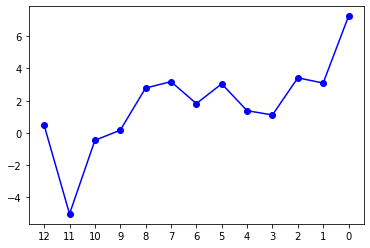

In [45]:
plt.plot(slags2, changes2, color='blue', marker='o', linestyle='solid')

In [46]:
b4 = ['CUUR0000SA0']

In [47]:
result4 = Series3(b4,key)

Series  CUUR0000SA0  exists


In [48]:
def inflation2(lag):
    # This function computes the percent change in the level of prices (inflation) for the 
    # 12 months starting '12+lag' months ago and ending 'lag' months ago.
    # lag is an integer input
    
    new = float(result4['Results']['series'][0]['data'][lag]['value'])
    old = float(result4['Results']['series'][0]['data'][12+lag]['value'])
    
    change = (new/old - 1)*100
    print('Inflation in the period starting ', lag, 'months ago and ending', 12+lag, 'months ago was ',round(change,1),'%')
    return change

In [49]:
for lag in [0,1,2,3,4]:
    inflation2(lag)

Inflation in the period starting  0 months ago and ending 12 months ago was  8.3 %
Inflation in the period starting  1 months ago and ending 13 months ago was  8.5 %
Inflation in the period starting  2 months ago and ending 14 months ago was  9.1 %
Inflation in the period starting  3 months ago and ending 15 months ago was  8.6 %
Inflation in the period starting  4 months ago and ending 16 months ago was  8.3 %


In [50]:
lags =[]
changes = []
for i in range(13):
    lags.append(i)
    changes.append(inflation2(i))


Inflation in the period starting  0 months ago and ending 12 months ago was  8.3 %
Inflation in the period starting  1 months ago and ending 13 months ago was  8.5 %
Inflation in the period starting  2 months ago and ending 14 months ago was  9.1 %
Inflation in the period starting  3 months ago and ending 15 months ago was  8.6 %
Inflation in the period starting  4 months ago and ending 16 months ago was  8.3 %
Inflation in the period starting  5 months ago and ending 17 months ago was  8.5 %
Inflation in the period starting  6 months ago and ending 18 months ago was  7.9 %
Inflation in the period starting  7 months ago and ending 19 months ago was  7.5 %
Inflation in the period starting  8 months ago and ending 20 months ago was  7.0 %
Inflation in the period starting  9 months ago and ending 21 months ago was  6.8 %
Inflation in the period starting  10 months ago and ending 22 months ago was  6.2 %
Inflation in the period starting  11 months ago and ending 23 months ago was  5.4 %
In

In [51]:
lags

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [52]:
changes

[8.262692503116241,
 8.52481474562552,
 9.059757964784154,
 8.581511543676523,
 8.258629340882372,
 8.542455554842432,
 7.871063897739283,
 7.479872468289117,
 7.036402865545144,
 6.809002839806477,
 6.221868903328898,
 5.390348855079163,
 5.251271554874992]

In [53]:
#lags.reverse()

In [54]:
lags

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [55]:
def int2str(i):
    return str(i)

mlags = map(int2str,lags)

In [56]:
mlags

In [57]:
slags = list(mlags)

In [58]:
slags.reverse()

In [59]:
slags

['12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0']

In [60]:
changes.reverse()

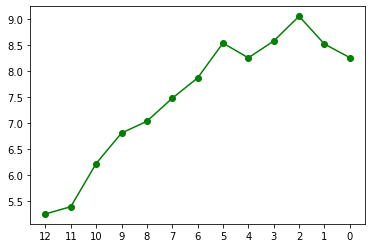

In [61]:
plt.plot(slags, changes, color='green', marker='o', linestyle='solid')

### Comparison between our CPI inflation rates and general CPI inflation rates
- Our inflation rates are consistently lower than the inflation rates of the general CPI.
- This differences can be attributed to the selection of items we chose.
- The prices of the items we chose to include in our basket did not change significantly in price over the five year period.

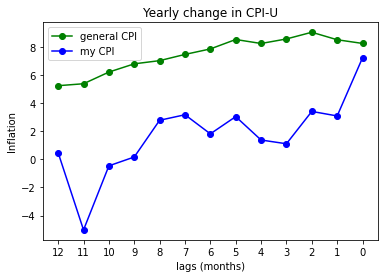

In [62]:
plt.plot(slags, changes, color='green', marker='o', linestyle='solid', label= "general CPI")
plt.plot(slags2, changes2, color='blue', marker='o', linestyle='solid', label = "my CPI")
plt.title("Yearly change in CPI-U")
plt.xlabel("lags (months)")
plt.ylabel("Inflation")
plt.legend()
plt.show()